In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
# Загрузка данных Iris
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [ ]:
# 2. Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# 3. Масштабирование признаков (важно для корректной работы регуляризации)
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [ ]:
# L1-регуляризация (Lasso)
# Для L1 используем solver 'liblinear', так как стандартный 'lbfgs' её не поддерживает
lr_l1 = LogisticRegression(penalty='l1', C=1.0, solver='liblinear', multi_class='ovr')
lr_l1.fit(X_train_std, y_train)

# L2-регуляризация (Ridge)
# По умолчанию в LogisticRegression используется L2
lr_l2 = LogisticRegression(penalty='l2', C=1.0, solver='lbfgs', multi_class='ovr')
lr_l2.fit(X_train_std, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='ovr')

In [ ]:
# Предсказание и оценка
y_pred_l1 = lr_l1.predict(X_test_std)
y_pred_l2 = lr_l2.predict(X_test_std)

print(f"Accuracy (L1): {accuracy_score(y_test, y_pred_l1):.2f}")
print(f"Accuracy (L2): {accuracy_score(y_test, y_pred_l2):.2f}")

Accuracy (L1): 0.91
Accuracy (L2): 0.91


In [ ]:
# Сравнение весов (L1 часто зануляет веса менее важных признаков)
print("\nВеса признаков (первый класс):")
print(f"L1 weights: {lr_l1.coef_[0]}")
print(f"L2 weights: {lr_l2.coef_[0]}")


Веса признаков (первый класс):
L1 weights: [ 0.          1.13853821 -3.83971121  0.        ]
L2 weights: [-0.95665003  1.11745674 -1.62914482 -1.47944403]


In [ ]:
from sklearn.model_selection import GridSearchCV

# Сетка параметров: пробуем разные значения C для L1 и L2
param_grid = [
    {'penalty': ['l1'], 'solver': ['liblinear'], 'C': [0.01, 0.1, 1, 10, 100]},
    {'penalty': ['l2'], 'solver': ['lbfgs'], 'C': [0.01, 0.1, 1, 10, 100]}
]

grid_search = GridSearchCV(LogisticRegression(multi_class='ovr'), param_grid, cv=5)
grid_search.fit(X_train_std, y_train)

print(f"Лучшие параметры: {grid_search.best_params_}")
print(f"Лучшая точность: {grid_search.best_score_:.2f}")

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was depre

Лучшие параметры: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
Лучшая точность: 0.94


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was depre

In [ ]:
import matplotlib.pyplot as plt

# Построим 2D график на двух признаках
X_vis = iris.data[:, :2]
y_vis = iris.target
X_train_v, X_test_v, y_train_v, y_test_v = train_test_split(X_vis, y_vis, test_size=0.3, random_state=42)

In [ ]:
# Обучаем модель на сокращенных данных
model = LogisticRegression(C=1.0).fit(X_train_v, y_train_v)

In [ ]:
# Создаем сетку для рисования границ
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

In [ ]:
# Предсказываем класс для каждой точки сетки
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

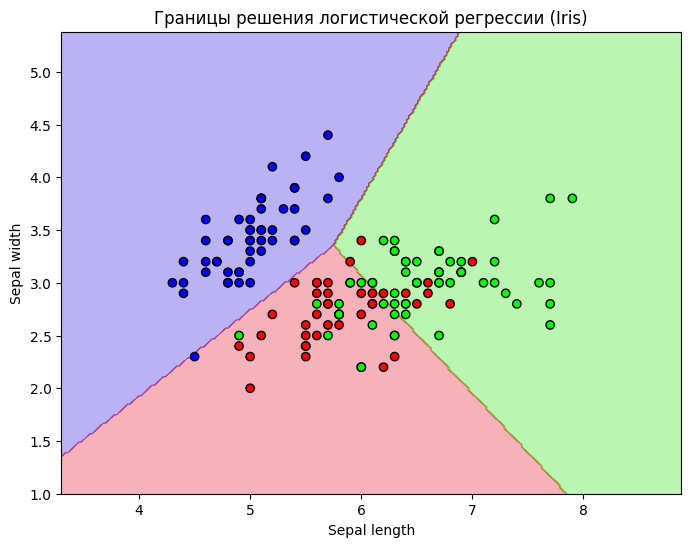

In [ ]:
# Визуализация
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.brg)
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y_vis, edgecolors='k', cmap=plt.cm.brg)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Границы решения логистической регрессии (Iris)')
plt.show()

Задание.

#1.

Используя логистическую регрессию с L1-регуляризацией, проведите эксперимент.

Загрузите датасет Iris и стандартизируйте его.

Обучите модель LogisticRegression с параметром penalty='l1', solver='liblinear'.

Создайте цикл, который перебирает значения C из списка: [0.001, 0.01, 0.1, 1, 10].

Для каждого значения C выведите количество коэффициентов (весов), которые стали равны абсолютному нулю.

#2.

Обучите две модели: одну с penalty='l1', другую с penalty='l2' при очень маленьком C=0.01.

Выведите на экран веса (model.coef_) для обеих моделей.

В какой модели веса распределены более равномерно?

В какой модели наблюдается резкий контраст между признаками?


In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [ ]:
# Подготовка данных
data = load_iris()
X, y = data.data, data.target
X_std = StandardScaler().fit_transform(X)

In [ ]:
Cs = [0.001, 0.01, 0.1, 1, 10]

for c in Cs:
    # 1. Создать модель с L1
    # 2. Обучить
    # 3. Посчитать количество нулевых весов: np.sum(model.coef_ == 0)
    pass